In [4]:
import os
import sys
import argparse
import glob
import pprint
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

In [5]:
pd.__version__

'1.0.3'

In [9]:
dist_csvs = glob.glob("../distances/*csv")


In [10]:
distDF = pd.concat([pd.read_csv(csv, index_col=0).assign(filename=os.path.basename(csv)) for csv in dist_csvs])


In [11]:
distDF.iloc[0]["filename"]

'evol_paths_first_seven_dna.nucleotide_scaled50_k51.jaccard_from_species.csv'

In [12]:
# add new columns based on scaled, ksize etc in the filenames
# NOTE:this is specific to the "evol_paths_first_seven_" basename
distDF["scaled"]= distDF["filename"].str.extract(r"scaled(\d*)")
distDF["ksize"] = distDF["filename"].str.extract(r"k(\d*)")
distDF["molecule"] = distDF["filename"].str.extract(r"evol_paths_first_seven_(\w*)")
distDF["full_alphabet"] = distDF["filename"].str.extract(r"\w.(\w*)_scaled")
distDF["alphabet"] = distDF["full_alphabet"].str.replace("translate_", "")

In [13]:
distDF = distDF.reset_index()


In [14]:
distDF = distDF.rename(columns={'index': 'path'})

In [15]:
distDF

,path,species,genus,family,order,class,phylum,superkingdom,filename,scaled,ksize,molecule,full_alphabet,alphabet
0,path1,1.0,0.000232,0.000023,0.000017,0.000000,0.000000,0.000000,evol_paths_first_seven_dna.nucleotide_scaled50...,50,51,dna,nucleotide,nucleotide
1,path2,1.0,0.000153,0.000000,0.000000,0.000000,0.000000,0.000000,evol_paths_first_seven_dna.nucleotide_scaled50...,50,51,dna,nucleotide,nucleotide
2,path3,1.0,0.002541,0.000497,0.000012,0.000000,0.000000,0.000000,evol_paths_first_seven_dna.nucleotide_scaled50...,50,51,dna,nucleotide,nucleotide
3,path4,1.0,0.000052,0.000242,0.000015,0.000000,0.000000,0.000000,evol_paths_first_seven_dna.nucleotide_scaled50...,50,51,dna,nucleotide,nucleotide
4,path5,1.0,0.000411,0.000000,0.000015,0.000000,0.000000,0.000000,evol_paths_first_seven_dna.nucleotide_scaled50...,50,51,dna,nucleotide,nucleotide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,path3,1.0,0.043071,0.015622,0.002249,0.000860,0.000500,0.001042,evol_paths_first_seven_rna.translate_dayhoff_s...,1000,15,rna,translate_dayhoff,dayhoff
1354,path4,1.0,0.014545,0.007664,0.001804,0.001068,0.000697,0.001074,evol_paths_first_seven_rna.translate_dayhoff_s...,1000,15,rna,translate_dayhoff,dayhoff
1355,path5,1.0,0.016470,0.003793,0.000531,0.000836,0.000336,0.000527,evol_paths_first_seven_rna.translate_dayhoff_s...,1000,15,rna,translate_dayhoff,dayhoff
1356,path6,1.0,0.041207,0.005483,0.002595,0.001481,0.000468,0.000572,evol_paths_first_seven_rna.translate_dayhoff_s...,1000,15,rna,translate_dayhoff,dayhoff


In [16]:
# need to build a new df with column: lineage ( contains species --> superkingdom)
# new column path--> path value
# col jaccard --> value 

In [17]:
meltedDF=pd.melt(distDF, id_vars=["path", "scaled", "ksize", "full_alphabet", "alphabet"], value_vars=["species", "genus", "family", "order", "class", "phylum", "superkingdom"],
        var_name='lineage', value_name='jaccard')

In [18]:
meltedDF

,path,scaled,ksize,full_alphabet,alphabet,lineage,jaccard
0,path1,50,51,nucleotide,nucleotide,species,1.000000
1,path2,50,51,nucleotide,nucleotide,species,1.000000
2,path3,50,51,nucleotide,nucleotide,species,1.000000
3,path4,50,51,nucleotide,nucleotide,species,1.000000
4,path5,50,51,nucleotide,nucleotide,species,1.000000
...,...,...,...,...,...,...,...
9501,path3,1000,15,translate_dayhoff,dayhoff,superkingdom,0.001042
9502,path4,1000,15,translate_dayhoff,dayhoff,superkingdom,0.001074
9503,path5,1000,15,translate_dayhoff,dayhoff,superkingdom,0.000527
9504,path6,1000,15,translate_dayhoff,dayhoff,superkingdom,0.000572


In [19]:
sns.set_style("white")

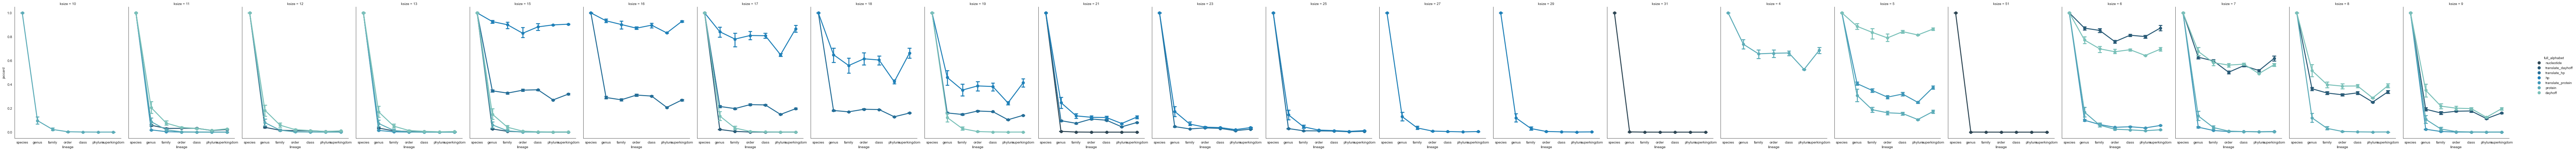

In [117]:
a = sns.catplot(data=meltedDF, x="lineage", y="jaccard", hue="full_alphabet", col="ksize",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point")

In [118]:
a.savefig('evol_path_first_seven_by_ksize_jaccard.pdf')

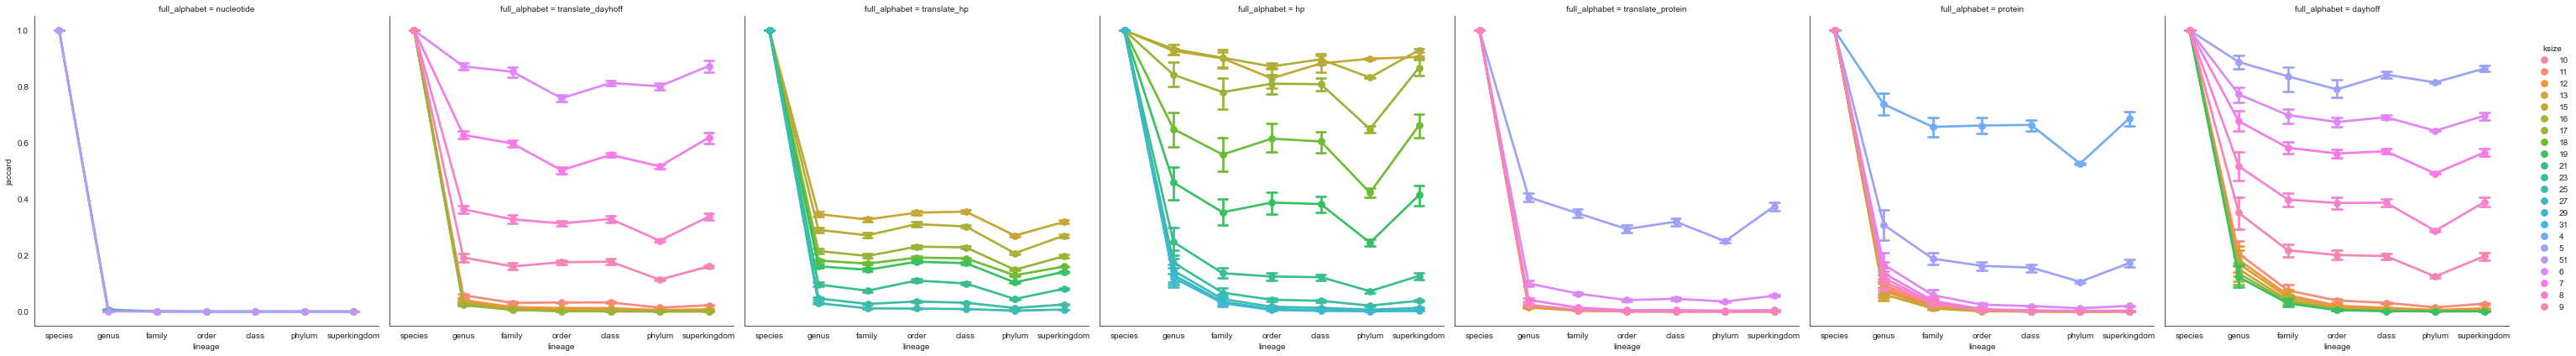

In [29]:
g = sns.catplot(data=meltedDF, x="lineage", y="jaccard", hue="ksize", col="full_alphabet",
                capsize=.2, height=6, aspect=1,
                kind="point") #palette="YlGnBu_d"
g.savefig('evol_path_first_seven_by_alphabet_jaccard.pdf')

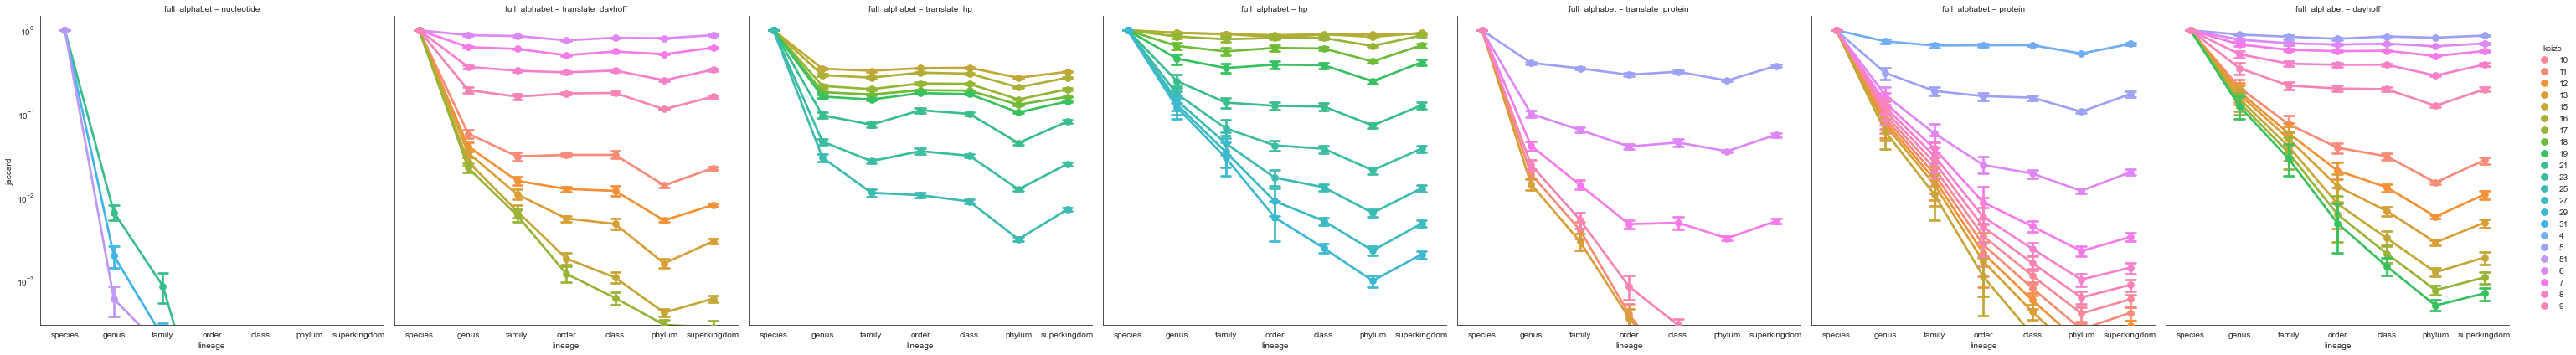

In [30]:
g = sns.catplot(data=meltedDF, x="lineage", y="jaccard", hue="ksize", col="full_alphabet",
                capsize=.2, height=6, aspect=1,
                kind="point") #palette="YlGnBu_d"
g.set(yscale="log")
g.savefig('evol_path_first_seven_by_alphabet_jaccard_logscale.pdf')

In [ ]:
#aggDF= distDF.groupby(["scaled", "ksize", "full_alphabet", "alphabet", "path"], as_index=False).agg(['mean','std'])